New york comments dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
import time

In [3]:
nyt_df = pd.read_csv("/content/drive/MyDrive/dm_hw4_nytdata/nyt-comments-2020.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
nyt_df.isAnonymous.unique()
nyt_df.isna().sum()
nyt_df.duplicated().sum()
# no duplicates

In [4]:
editorsSelection_df	 = nyt_df.editorsSelection
nyt_df_dropped = nyt_df.drop(['userTitle','parentID','parentUserDisplayName', 'permID','commentID', 'commentSequence','articleID','status', 'trusted', 'recommendedFlag' ,], axis = 1)

Wordcloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


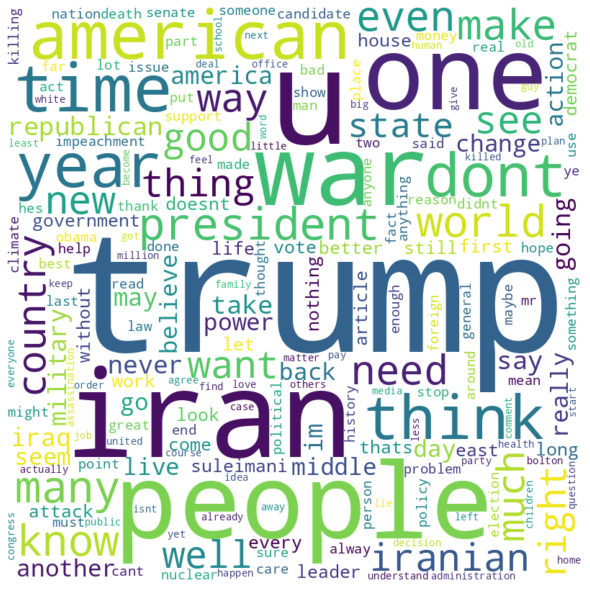

In [12]:
import re
import nltk
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

# txt=nyt_df.commentBody.iloc[0:3]
clean_text = re.compile(r"(?:https?\S+|@\S+|#\S+|[^a-zA-Z\s])+")
def clean_txt(txt):
    txt = clean_text.sub("", txt)  # Remove URLs
    # txt = re.sub(r"@[^\s]+", "", txt)  # Remove mentions
    # txt = re.sub(r"#(\w+)", "", txt)  # Remove hashtags
    # txt = re.sub(r"[^a-zA-Z\s]", "", txt)  # Remove non-alphabetic characters
    txt=txt.lower()
    return txt

def tokenize_txt(txt):
    return txt.split()

def remove_stop_words(words):
    return [word for word in words if word not in stop_words]

processed_txt = str()

for raw_text in nyt_df.commentBody.iloc[0:100000]:
    cleaned_text = clean_txt(raw_text)
    tokenized_text = tokenize_txt(cleaned_text)
    filtered_text = remove_stop_words(tokenized_text)
    str1= ' '.join(filtered_text)
    processed_txt= processed_txt+ " "+ str1

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', collocations = False, 
                min_font_size = 10).generate(str(processed_txt))

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('wordcloud.png')
plt.show()

In [6]:
nyt_df_dropped= nyt_df_dropped.drop(['commentBody'], axis = 1)
nyt_df_categorical = nyt_df_dropped.select_dtypes(include=['object', 'bool']).columns
nyt_df_categorical

Index(['userDisplayName', 'userLocation', 'createDate', 'updateDate',
       'approveDate', 'editorsSelection', 'commentType', 'isAnonymous'],
      dtype='object')

In [7]:
le=LabelEncoder()
le_list=[]
for features in nyt_df_categorical:
  nyt_df_dropped[features] = le.fit_transform(nyt_df_dropped[features])

In [8]:
scaled_nyt_data = StandardScaler().fit_transform(nyt_df_dropped.loc[:,nyt_df_dropped.columns!= 'editorsSelection'].values)
nyt_df_dropped.loc[:,nyt_df_dropped.columns!= 'editorsSelection'] = pd.DataFrame(scaled_nyt_data, index=nyt_df_dropped.loc[:,nyt_df_dropped.columns!= 'editorsSelection'].index, columns=nyt_df_dropped.loc[:,nyt_df_dropped.columns!= 'editorsSelection'].columns)

In [29]:
nyt_df_dropped

,userID,userDisplayName,userLocation,createDate,updateDate,approveDate,recommendations,replyCount,editorsSelection,depth,commentType,isAnonymous
0,0.005292,1.551176,1.602082,-1.725344,-1.722703,-1.715591,-0.122966,2.014254,0,-0.874457,-0.874199,0.0
1,0.194598,-0.520145,-0.923246,-1.725342,-1.722617,-1.715588,-0.028142,-0.191804,0,1.143566,1.144610,0.0
2,0.174512,1.419814,-0.050852,-1.725341,-1.722616,-1.715587,-0.113483,-0.191804,0,1.143566,1.144610,0.0
3,0.005292,1.551176,1.602082,-1.725221,-1.722614,-1.715438,-0.179860,-0.191804,0,1.143566,1.144610,0.0
4,0.194598,-0.520145,-0.923246,-1.725151,-1.722678,-1.715356,-0.179860,-0.191804,0,1.143566,1.144610,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4986456,-1.609845,-0.971474,-0.452732,1.741619,1.743400,1.819173,-0.160895,-0.191804,0,-0.874457,-0.874199,0.0
4986457,1.005717,-0.500920,0.096915,1.741620,1.740157,1.819174,-0.170378,-0.191804,0,-0.874457,-0.874199,0.0
4986458,-1.912808,-1.039282,0.191280,1.741636,1.742849,1.819187,-0.113483,-0.191804,0,-0.874457,-0.874199,0.0
4986459,0.700043,-1.651692,-1.034613,1.741297,1.740141,1.819223,-0.141931,-0.191804,0,-0.874457,-0.874199,0.0


In [9]:
not_selected= nyt_df_dropped[nyt_df_dropped.editorsSelection==False]
yes_selected= nyt_df_dropped[nyt_df_dropped.editorsSelection==True]

In [10]:
not_selected=not_selected.drop('editorsSelection', axis=1)
yes_selected=yes_selected.drop('editorsSelection', axis=1)

Problem 4 kmeans algorithm

In [41]:
# kmeans algorithm ck
import numpy as np
import random
import math

def eud(tup1,tup2):
  eu_dist = np.linalg.norm(np.array(tup1) - np.array(tup2))
  return eu_dist

def c_k(d,dist,k,r):
  c = main(d,dist,k,r)
  temp_v = 'v'
  temp_b = 'b'
  centroids = [a[temp_v] for key, a in c.items() if temp_v in a]
  clusters = [a[temp_b] for key, a in c.items() if temp_b in a]
  return centroids,clusters

def main(d,dist,k,thresh): 
  i = 0
  j = 1
  idx = 0
  prev_cen = list()
  tow = list()
  compare = float('inf')
  dist =list()
  cen_values= defaultdict(dict)
  cen_values['j'] = defaultdict(dict)
  c = cen_values['j']
  rand_centroids = random.choices(d,k=k)
  for j in range(1,k+1):
    c[j]= {'v': rand_centroids[j-1], 'b':list()}
  while(True):
    tow = list()
    for data_point in d:
      j=1
      while(j<=k):
        dist.append(eud(c[j]['v'],data_point))
        j+=1
      idx = dist.index(np.min(dist)) 
      c[idx+1]['b'].append(data_point)
      dist = list()
    if compare < thresh:
      break
    for j in range(1,k+1):
      n = len(c[j]['b'])
      prev_cen = c[j]['v']
      if n!=0:
        c[j]['v'] = (*map(lambda x: x/n, (*map(sum, zip(*c[j]['b'])),)),)
      c[j]['b']=list()
      diff_c = np.subtract(prev_cen,c[j]['v'])
      tow.append(math.sqrt(abs((np.dot(tuple(reversed(diff_c)),diff_c)))/k))
    compare = sum(tow)  
  return c

In [ ]:
set_not_selected= set(map(tuple,np.array(not_selected)))
for k in range(2,6):
  total_error = list()
  dist=list()
  for _ in range(0,20):
    error = []
    sum_error =[]
    centroids,clusters = c_k(np.array(nyt_df_dropped.loc[:,nyt_df_dropped.columns!= 'editorsSelection']),dist,k,10) 
    no = np.zeros(shape = (1,k))
    yes = np.zeros(shape = (1,k))
    for s in range(0,k):
      for p in range(0,len(clusters[s])):
        if tuple(clusters[s][p]) in set_not_selected:
          no[0][s]+=1
        else:
          yes[0][s]+=1
      if (no[0][s]+yes[0][s])!=0:
        if no[0][s] >= yes[0][s]:
          temp =yes[0][s]/(no[0][s]+yes[0][s])
        else:
          temp = no[0][s]/(no[0][s]+yes[0][s])
      else:
        temp=0
      error.append(temp)
    sum_error  = sum(error)/k
    total_error.append(sum_error)
  plt.boxplot(total_error)
  plt.xlabel(f'cluster K= {k}')
  plt.ylabel('Error rate')
  plt.title('K means Error Boxplot of New york comments data')
  plt.savefig(f'Boxplot c_k{k} of NY data')
  plt.clf()

Problem 5 sse nyt

In [ ]:
import numpy as np
import random
import math
from collections import defaultdict
def eud(tup1,tup2):
  eu_dist = np.linalg.norm(np.array(tup1) - np.array(tup2))
  return eu_dist

def c_ksse(d,dist,k,r):
  c = main_sse(d,dist,k,r)
  temp_v = 'v'
  temp_b = 'b'
  centroids = [a[temp_v] for key, a in c.items() if temp_v in a]
  clusters = [a[temp_b] for key, a in c.items() if temp_b in a]
  return centroids,clusters

def main_sse(d,dist,k,thresh): 
  i = 0
  j = 1
  idx = 0
  prev_sse= list()
  curr_sse= float('inf')
  dist =list()
  cen_values= defaultdict(dict)
  cen_values['j'] = defaultdict(dict)
  c = cen_values['j']
  for j in range(1,k+1):
    rand_centroids = random.choices(d,k=k)
    c[j]= {'v': rand_centroids[j-1], 'b':list(), 'sse': list()}
  while(True):
    for data_point in d:
      j=1
      while(j<=k):
        dist.append(eud(c[j]['v'],data_point))
        j+=1
      min = np.min(dist)
      idx = dist.index(min) 
      c[idx+1]['sse'].append(min)
      c[idx+1]['b'].append(data_point)
      dist = list()
    for j in range(1,k+1):
      prev_sse.append(sum(c[j]['sse'])/len(c[j]['sse']))
    all_prev_sse = sum(prev_sse)/k
    prev_sse =list()
    if curr_sse - all_prev_sse < thresh:
      break
    else:
      curr_sse= all_prev_sse
    for j in range(1,k+1):
      n = len(c[j]['b'])
      if n!=0:
        c[j]['v'] = (*map(lambda x: x/n, (*map(sum, zip(*c[j]['b'])),)),)
      c[j]['sse']=list()
      c[j]['b']=list()
  return c

In [ ]:
set_not_selected= set(map(tuple,np.array(not_selected)))
for k in range(2,6):
  total_error = list()
  dist=list()
  for _ in range(0,20):
    error = []
    sum_error =[]
    centroids,clusters = c_ksse(np.array(nyt_df_dropped.loc[:,nyt_df_dropped.columns!= 'editorsSelection']),dist,k,1) 
    no = np.zeros(shape = (1,k))
    yes = np.zeros(shape = (1,k))
    for s in range(0,k):
      for p in range(0,len(clusters[s])):
        if tuple(clusters[s][p]) in set_not_selected:
          no[0][s]+=1
        else:
          yes[0][s]+=1
      if (no[0][s]+yes[0][s])!=0:
        if no[0][s] >= yes[0][s]:
          temp =yes[0][s]/(no[0][s]+yes[0][s])
        else:
          temp = no[0][s]/(no[0][s]+yes[0][s])
      else:
        temp=0
      error.append(temp)
    sum_error  = sum(error)/k
    total_error.append(sum_error)
  plt.boxplot(total_error)
  plt.xlabel(f'cluster K= {k}')
  plt.ylabel('Error rate')
  plt.title('K means SSE Error Boxplot of New york comments data')
  plt.savefig(f'Boxplot c_ksse{k} of NY data')
  plt.clf()

Problem 6 k means++ nyt

In [ ]:
# kmeans++ algorithm 
import numpy as np
import random
import math

def eud(tup1,tup2):
  eu_dist = np.linalg.norm(np.array(tup1) - np.array(tup2))
  return eu_dist

def c_k_plus_plus(d,dist,k,r):
  c = main_plus_plus(d,dist,k,r)
  temp_v = 'v'
  temp_b = 'b'
  centroids = [a[temp_v] for key, a in c.items() if temp_v in a]
  clusters = [a[temp_b] for key, a in c.items() if temp_b in a]
  return centroids,clusters

def main_plus_plus(d,dist,k,thresh): 
  i = 0
  j = 1
  idx = 0
  prev_cen = list()
  tow = list()
  compare = float('inf')
  dist =list()
  cen_values= defaultdict(dict)
  cen_values['j'] = defaultdict(dict)
  c = cen_values['j']
  first_cent = random.choice(d)
  c[1]['v'] = first_cent
  c[1]['b'] = list()
  for j in range(1,k):
    for i in range(1,j+1):
      dist_probability = np.array([np.linalg.norm(np.array(d) - c[i]['v'],axis=1)**2]).T
    row_sum = np.min(dist_probability,axis=1)
    row_sum = row_sum/sum(row_sum)
    c[j+1] = {'v':np.array(d)[np.random.choice(len(row_sum),p = row_sum)],'b':list()}
  while(True):
    tow = list()
    for data_point in d:
      dist = list()
      j=1
      while(j<=k):
        dist.append(eud(c[j]['v'],data_point))
        j+=1
      idx = dist.index(np.min(dist)) 
      c[idx+1]['b'].append(data_point)
    if compare < thresh:
      break
    for j in range(1,k+1):
      n = len(c[j]['b'])
      prev_cen = c[j]['v']
      if n!=0:
        c[j]['v'] = (*map(lambda x: x/n, (*map(sum, zip(*c[j]['b'])),)),)
      c[j]['b']=list()
      diff_c = np.subtract(prev_cen,c[j]['v'])
      tow.append(math.sqrt(abs((np.dot(tuple(reversed(diff_c)),diff_c)))/k))
    compare = sum(tow)  
  return c

In [ ]:
set_not_selected= set(map(tuple,np.array(not_selected)))
for k in range(2,6):
  total_error = list()
  dist=list()
  for _ in range(0,20):
    error = []
    sum_error =[]
    centroids,clusters = c_k_plus_plus(np.array(nyt_df_dropped.loc[:,nyt_df_dropped.columns!= 'editorsSelection']),dist,k,10) 
    no = np.zeros(shape = (1,k)) 
    no = np.zeros(shape = (1,k))
    yes = np.zeros(shape = (1,k))
    for s in range(0,k):
      for p in range(0,len(clusters[s])):
        if tuple(clusters[s][p]) in set_not_selected:
          no[0][s]+=1
        else:
          yes[0][s]+=1
      if (no[0][s]+yes[0][s])!=0:
        if no[0][s] >= yes[0][s]:
          temp =yes[0][s]/(no[0][s]+yes[0][s])
        else:
          temp = no[0][s]/(no[0][s]+yes[0][s])
      else:
        temp=0
      error.append(temp)
    sum_error  = sum(error)/k
    total_error.append(sum_error)
  plt.boxplot(total_error)
  plt.xlabel(f'cluster K= {k}')
  plt.ylabel('Error rate')
  plt.title('K means ++ Error Boxplot of New york comments data')
  plt.savefig(f'Boxplot c_k_plus_plus{k} of NY data')
  plt.clf()

Problem 7 elbow nyt

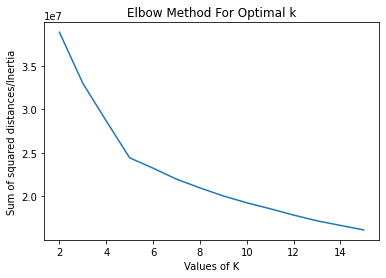

In [11]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,16)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(nyt_df_dropped)
 Sum_of_squared_distances.append(kmeans.inertia_)


plt.plot(K,Sum_of_squared_distances)
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.savefig('Elbow method New york.png')
plt.show()